 # PROJECT OVERVIEW  :  Used Cars Price Prediction and Market Analysis

The used car market in cities like Delhi, Mumbai, Kolkata, Kerala, Haryana, Uttar Pradesh, and Gujarat faces issues like unclear pricing and lack of reliable tools. Buyers struggle to know a car’s real value, while sellers often overprice. This makes fair deals difficult. The project aims to solve this by analyzing market data, predicting accurate car prices, and giving useful insights to dealerships. It will help dealers improve pricing strategies, boost sales, and offer buyers more transparent pricing.

# DATA USED

The dataset contains used car listings from different states. Key details include:

**Car Info**: Make, model, series, fuel type, transmission, and seating capacity.

**Year & Mileage**: Year of manufacture and kilometers driven, which affect the price.

**Ownership & EMI**: Whether the car is 1st or 2nd owner, and EMI details, showing its history and finances.

**Price**: The car’s listed price, which we aim to predict.

The goal is to analyze this data, find patterns, and build models to accurately predict car prices based on factors like brand, model, age, fuel type, and more.

# Purpose Of Project

The purpose of this project is to use data and machine learning to predict the prices of used cars, so that dealers can set fair and competitive prices to increase profits, and buyers can get accurate price estimates to make better and more confident buying decisions, leading to fair deals for both sides.

# 2. DATA PREPROCESSING

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [62]:
df=pd.read_csv(r"C:\Users\sweth\Downloads\Telegram Desktop\total_cars") # loading the dataset

In [63]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,state,city,year,make,model,series,transmission,fuel,owner,emi,kilometers,mileage,seating,price
0,0,0,0,CapitalUT,Delhi,2020,FORD,ECOSPORT,TITANIUM 1.5L DIESEL,Manual,Diesel,1st,15425,96075,9,5,789000
1,1,1,1,CapitalUT,Delhi,2016,Ford,Ecosport,1.5AMBIENTE TI VCT,Manual,Petrol,1st,10792,55017,9,5,552000
2,2,2,2,CapitalUT,Delhi,2018,FORD,ECOSPORT,AMBIENTE 1.5L DIESEL,Manual,Diesel,1st,13978,24931,9,5,715000
3,3,3,3,CapitalUT,Delhi,2019,FORD,ECOSPORT,TITANIUM 1.5L PETROL,Manual,Petrol,1st,15503,22270,9,5,793000
4,4,4,4,CapitalUT,Delhi,2015,Ford,Ecosport,TITANIUM 1.5L PETROL AT,Automatic,Petrol,2nd,10440,78906,9,5,534000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,304,5,5,UttarPradesh,Noida,2021,Tata,Tiago,XZ PETROL,Manual,Petrol,1st,12512,21726,11,5,640000
1811,305,6,6,UttarPradesh,Noida,2018,Tata,Tiago,XZA 1.2 REVOTRON,Automatic,Petrol,2nd,10459,27451,11,5,535000
1812,306,7,7,UttarPradesh,Noida,2022,Tata,Tiago,XZ+ CNG 1.2 RTN,Manual,CNG,1st,14799,30399,11,5,757000
1813,307,8,8,UttarPradesh,Noida,2018,Tata,Tiago,XZ 1.2 REVOTRON,Manual,Petrol,1st,9736,12249,11,5,498000


In [64]:
df.shape # Number of rows and columns

(1815, 17)

In [65]:

df.head()  # This returns the first 5 rows of the DataFrame 'df'

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,state,city,year,make,model,series,transmission,fuel,owner,emi,kilometers,mileage,seating,price
0,0,0,0,CapitalUT,Delhi,2020,FORD,ECOSPORT,TITANIUM 1.5L DIESEL,Manual,Diesel,1st,15425,96075,9,5,789000
1,1,1,1,CapitalUT,Delhi,2016,Ford,Ecosport,1.5AMBIENTE TI VCT,Manual,Petrol,1st,10792,55017,9,5,552000
2,2,2,2,CapitalUT,Delhi,2018,FORD,ECOSPORT,AMBIENTE 1.5L DIESEL,Manual,Diesel,1st,13978,24931,9,5,715000
3,3,3,3,CapitalUT,Delhi,2019,FORD,ECOSPORT,TITANIUM 1.5L PETROL,Manual,Petrol,1st,15503,22270,9,5,793000
4,4,4,4,CapitalUT,Delhi,2015,Ford,Ecosport,TITANIUM 1.5L PETROL AT,Automatic,Petrol,2nd,10440,78906,9,5,534000


In [66]:
df.info() # This provides a summary of the DataFrame 'df', including the number of non-null entries, data types of each column, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.2  1815 non-null   int64 
 1   Unnamed: 0.1  1815 non-null   int64 
 2   Unnamed: 0    1815 non-null   int64 
 3   state         1815 non-null   object
 4   city          1815 non-null   object
 5   year          1815 non-null   int64 
 6   make          1815 non-null   object
 7   model         1815 non-null   object
 8   series        1799 non-null   object
 9   transmission  1799 non-null   object
 10  fuel          1815 non-null   object
 11  owner         1815 non-null   object
 12  emi           1815 non-null   int64 
 13  kilometers    1815 non-null   int64 
 14  mileage       1815 non-null   int64 
 15  seating       1815 non-null   int64 
 16  price         1815 non-null   int64 
dtypes: int64(9), object(8)
memory usage: 241.2+ KB


In [67]:
df=df.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0']) #Removing the unnecessary columns

In [68]:
df

,state,city,year,make,model,series,transmission,fuel,owner,emi,kilometers,mileage,seating,price
0,CapitalUT,Delhi,2020,FORD,ECOSPORT,TITANIUM 1.5L DIESEL,Manual,Diesel,1st,15425,96075,9,5,789000
1,CapitalUT,Delhi,2016,Ford,Ecosport,1.5AMBIENTE TI VCT,Manual,Petrol,1st,10792,55017,9,5,552000
2,CapitalUT,Delhi,2018,FORD,ECOSPORT,AMBIENTE 1.5L DIESEL,Manual,Diesel,1st,13978,24931,9,5,715000
3,CapitalUT,Delhi,2019,FORD,ECOSPORT,TITANIUM 1.5L PETROL,Manual,Petrol,1st,15503,22270,9,5,793000
4,CapitalUT,Delhi,2015,Ford,Ecosport,TITANIUM 1.5L PETROL AT,Automatic,Petrol,2nd,10440,78906,9,5,534000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,UttarPradesh,Noida,2021,Tata,Tiago,XZ PETROL,Manual,Petrol,1st,12512,21726,11,5,640000
1811,UttarPradesh,Noida,2018,Tata,Tiago,XZA 1.2 REVOTRON,Automatic,Petrol,2nd,10459,27451,11,5,535000
1812,UttarPradesh,Noida,2022,Tata,Tiago,XZ+ CNG 1.2 RTN,Manual,CNG,1st,14799,30399,11,5,757000
1813,UttarPradesh,Noida,2018,Tata,Tiago,XZ 1.2 REVOTRON,Manual,Petrol,1st,9736,12249,11,5,498000


In [69]:
df['make'] = df['make'].str.upper() # This converts all values in the 'make' column to uppercase.
df['model'] = df['model'].str.upper() # This converts all values in the 'model' column to uppercase.
df.drop_duplicates(inplace=True) # This removes any duplicate rows from the DataFrame 'df' in place (modifying the original DataFrame)

In [70]:
df.head()

,state,city,year,make,model,series,transmission,fuel,owner,emi,kilometers,mileage,seating,price
0,CapitalUT,Delhi,2020,FORD,ECOSPORT,TITANIUM 1.5L DIESEL,Manual,Diesel,1st,15425,96075,9,5,789000
1,CapitalUT,Delhi,2016,FORD,ECOSPORT,1.5AMBIENTE TI VCT,Manual,Petrol,1st,10792,55017,9,5,552000
2,CapitalUT,Delhi,2018,FORD,ECOSPORT,AMBIENTE 1.5L DIESEL,Manual,Diesel,1st,13978,24931,9,5,715000
3,CapitalUT,Delhi,2019,FORD,ECOSPORT,TITANIUM 1.5L PETROL,Manual,Petrol,1st,15503,22270,9,5,793000
4,CapitalUT,Delhi,2015,FORD,ECOSPORT,TITANIUM 1.5L PETROL AT,Automatic,Petrol,2nd,10440,78906,9,5,534000


In [71]:
# Display the initial DataFrame
print("Initial DataFrame:")
print(df)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Remove rows with missing values
df_cleaned = df.dropna()

# Display the cleaned DataFrame
print("\nDataFrame after removing rows with missing values:")
print(df_cleaned)

# Check if the cleaned DataFrame has any missing values
missing_values_cleaned = df_cleaned.isnull().sum()
print("\nMissing values in cleaned DataFrame:")
print(missing_values_cleaned)

# If there are no missing values in the cleaned data
if missing_values_cleaned.sum() == 0:
    print("\nThe cleaned DataFrame has no missing values!")

Initial DataFrame:
             state   city  year  make     model                   series  \
0        CapitalUT  Delhi  2020  FORD  ECOSPORT     TITANIUM 1.5L DIESEL   
1        CapitalUT  Delhi  2016  FORD  ECOSPORT       1.5AMBIENTE TI VCT   
2        CapitalUT  Delhi  2018  FORD  ECOSPORT     AMBIENTE 1.5L DIESEL   
3        CapitalUT  Delhi  2019  FORD  ECOSPORT     TITANIUM 1.5L PETROL   
4        CapitalUT  Delhi  2015  FORD  ECOSPORT  TITANIUM 1.5L PETROL AT   
...            ...    ...   ...   ...       ...                      ...   
1810  UttarPradesh  Noida  2021  TATA     TIAGO                XZ PETROL   
1811  UttarPradesh  Noida  2018  TATA     TIAGO         XZA 1.2 REVOTRON   
1812  UttarPradesh  Noida  2022  TATA     TIAGO          XZ+ CNG 1.2 RTN   
1813  UttarPradesh  Noida  2018  TATA     TIAGO          XZ 1.2 REVOTRON   
1814  UttarPradesh  Noida  2019  TATA     TIAGO         XZA 1.2 REVOTRON   

     transmission    fuel owner    emi  kilometers  mileage  seating

In [72]:
print("Data types of each column:",df.dtypes)  # This prints the data types of each column in the DataFrame 'df'.

Data types of each column: state           object
city            object
year             int64
make            object
model           object
series          object
transmission    object
fuel            object
owner           object
emi              int64
kilometers       int64
mileage          int64
seating          int64
price            int64
dtype: object


In [73]:
input_data = df.iloc[:, :-1]  # This selects all rows and all columns except the last column from the DataFrame 'df' and stores it in 'input_data'.
input_data

,state,city,year,make,model,series,transmission,fuel,owner,emi,kilometers,mileage,seating
0,CapitalUT,Delhi,2020,FORD,ECOSPORT,TITANIUM 1.5L DIESEL,Manual,Diesel,1st,15425,96075,9,5
1,CapitalUT,Delhi,2016,FORD,ECOSPORT,1.5AMBIENTE TI VCT,Manual,Petrol,1st,10792,55017,9,5
2,CapitalUT,Delhi,2018,FORD,ECOSPORT,AMBIENTE 1.5L DIESEL,Manual,Diesel,1st,13978,24931,9,5
3,CapitalUT,Delhi,2019,FORD,ECOSPORT,TITANIUM 1.5L PETROL,Manual,Petrol,1st,15503,22270,9,5
4,CapitalUT,Delhi,2015,FORD,ECOSPORT,TITANIUM 1.5L PETROL AT,Automatic,Petrol,2nd,10440,78906,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,UttarPradesh,Noida,2021,TATA,TIAGO,XZ PETROL,Manual,Petrol,1st,12512,21726,11,5
1811,UttarPradesh,Noida,2018,TATA,TIAGO,XZA 1.2 REVOTRON,Automatic,Petrol,2nd,10459,27451,11,5
1812,UttarPradesh,Noida,2022,TATA,TIAGO,XZ+ CNG 1.2 RTN,Manual,CNG,1st,14799,30399,11,5
1813,UttarPradesh,Noida,2018,TATA,TIAGO,XZ 1.2 REVOTRON,Manual,Petrol,1st,9736,12249,11,5


In [74]:
output_data=df["price"] # This selects the "price" column from the DataFrame 'df' and stores it in 'output_data'.
output_data

0       789000
1       552000
2       715000
3       793000
4       534000
         ...  
1810    640000
1811    535000
1812    757000
1813    498000
1814    537000
Name: price, Length: 1815, dtype: int64

In [75]:
df.isnull() # To find null values

,state,city,year,make,model,series,transmission,fuel,owner,emi,kilometers,mileage,seating,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1811,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1812,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1813,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# 3. EXPLORATORY DATA ANALYSIS (EDA)

**Descriptive Statistics**

In [76]:
numerical_cols = ['price', 'kilometers', 'mileage', 'emi', 'seating']  
# This defines a list of numerical columns that we want to analyze.

print("Summary statistics for numerical columns :")  
# This prints a message indicating that summary statistics for numerical columns will be shown.

df[numerical_cols].describe()  
# This calculates and displays summary statistics (like mean, std, min, max, etc.) for the specified numerical columns in the DataFrame 'df'.

Summary statistics for numerical columns :


,price,kilometers,mileage,emi,seating
count,1.815000e+03,1815.000000,1815.000000,1815.000000,1815.000000
mean,6.920712e+05,37982.656198,14.132782,13388.598347,5.071625
std,3.219937e+05,24772.552008,2.620103,6050.751789,0.299475
min,1.900000e+05,1.000000,9.000000,3715.000000,5.000000
25%,4.930000e+05,17524.000000,12.000000,9638.000000,5.000000
50%,5.890000e+05,32282.000000,15.000000,11515.000000,5.000000
75%,7.820000e+05,55947.500000,16.000000,15267.000000,5.000000
max,1.879000e+06,100245.000000,19.000000,35765.000000,7.000000


In [77]:
# Calculate the average price of cars
average_price = df['price'].mean()
print("The average price of cars is:", average_price)

The average price of cars is: 692071.1845730027


In [78]:
# Calculate the average mileage of cars
average_mileage = df['mileage'].mean()
print("The average mileage of cars is:", average_mileage)

The average mileage of cars is: 14.132782369146005


In [79]:
# Get the most common car model
most_common_model = df['model'].mode()[0]
print("The most common car model in the dataset is:", most_common_model)

The most common car model in the dataset is: GRAND I10


In [80]:
# Find the car model with the highest mileage
max_mileage_model = df.loc[df['mileage'].idxmax()]['model']
print("The car model with the highest mileage is:", max_mileage_model)

The car model with the highest mileage is: KWID


In [81]:
# Calculate the price depreciation based on age
df['price_depreciation'] = df['price'] / df['year']

# Find the car model with the highest price depreciation (resale value)
best_resale_value_model = df.loc[df['price_depreciation'].idxmax()]['model']
print("The car model with the highest resale value is:", best_resale_value_model)

The car model with the highest resale value is: SELTOS


# **Categorical Data Analysis**

In [82]:
# Find the most common fuel type
most_common_fuel_type = df['fuel'].mode()[0]
print("The most common fuel type in the dataset is:", most_common_fuel_type)

The most common fuel type in the dataset is: Petrol


In [83]:
# Get the total number of cars
total_cars = df.shape[0]
print("The total number of cars in the dataset is:", total_cars)

The total number of cars in the dataset is: 1815


In [84]:
#What are the unique values and their counts for categorical columns (state, city, make, model, fuel, transmission, owner)?
print("unique value of states are:" ,df["state"].unique())
print("value counts of states are:" ,df["state"].value_counts())
print(" ")
print("unique value of city are:" ,df["city"].unique())
print("value counts of city are:" ,df["city"].value_counts())    
print("unique value of make are:" ,df["make"].unique())
print("value counts of make are:" ,df["make"].value_counts())
print(" ")
print("unique value of model are:" ,df["model"].unique())
print("value counts of model are:" ,df["model"].value_counts())
print(" ")
print("unique value of fuel are:" ,df["fuel"].unique())
print("value counts of fuel are:" ,df["fuel"].value_counts())
print(" ")
print("unique value of transmission are:" ,df["transmission"].unique())
print("value counts of transmission are:" ,df["transmission"].value_counts())
print(" ")
print("unique value of owner are:" ,df["owner"].unique())
print("value counts of owner are:" ,df["owner"].value_counts())

unique value of states are: ['CapitalUT' 'Maharashtra' 'WestBengal' 'Kerala' 'Haryana' 'UttarPradesh'
 'Gujarat']
value counts of states are: state
UttarPradesh    638
CapitalUT       335
Haryana         312
Maharashtra     215
Gujarat         139
WestBengal      120
Kerala           56
Name: count, dtype: int64
 
unique value of city are: ['Delhi' 'Mumbai' 'Kolkata' 'Kochi' 'Gurgaon' 'Ghaziabad' 'Ahmedabad'
 'ahmedabad' 'Noida']
value counts of city are: city
Delhi        335
Ghaziabad    329
Gurgaon      312
Noida        309
Mumbai       215
Ahmedabad    136
Kolkata      120
Kochi         56
ahmedabad      3
Name: count, dtype: int64
unique value of make are: ['FORD' 'HONDA' 'HYUNDAI' 'KIA' 'MAHINDRA' 'MARUTI' 'RENAULT' 'TATA']
value counts of make are: make
HYUNDAI     391
MARUTI      367
HONDA       319
TATA        239
RENAULT     198
FORD        115
MAHINDRA    109
KIA          77
Name: count, dtype: int64
 
unique value of model are: ['ECOSPORT' 'FREESTYLE' 'AMAZE' 'CITY' 'JAZZ' 

In [85]:
# Count the number of car listings based on fuel type
fuel_type_listing_count = df['fuel'].value_counts()
print("The number of car listings based on fuel type is:\n", fuel_type_listing_count)

The number of car listings based on fuel type is:
 fuel
Petrol    1434
Diesel     191
CNG        190
Name: count, dtype: int64


# **Analyzing relationships**

In [86]:
# Group by 'fuel' and calculate the average price for each fuel type
fuel_price_distribution = df.groupby('fuel')['price'].mean()
print("The average price distribution based on fuel type is:\n", fuel_price_distribution)

The average price distribution based on fuel type is:
 fuel
CNG       574147.368421
Diesel    973565.445026
Petrol    670202.370990
Name: price, dtype: float64


In [87]:
# Group by 'city' and count the number of cars
cars_by_city = df['city'].value_counts()
print("Number of cars listed in each city:\n", cars_by_city)

Number of cars listed in each city:
 city
Delhi        335
Ghaziabad    329
Gurgaon      312
Noida        309
Mumbai       215
Ahmedabad    136
Kolkata      120
Kochi         56
ahmedabad      3
Name: count, dtype: int64


In [88]:
# Sort cars by 'price' and get the top 5 most expensive ones
top_5_expensive_cars = df.sort_values(by='price', ascending=False).head(5)
print("The top 5 most expensive cars are:\n", top_5_expensive_cars[['make', 'model', 'price']])

The top 5 most expensive cars are:
           make    model    price
450        KIA   SELTOS  1879000
451        KIA   SELTOS  1863000
1642  MAHINDRA  SCORPIO  1746000
881   MAHINDRA  SCORPIO  1746000
158   MAHINDRA  SCORPIO  1746000


In [89]:
# Group by 'owner' and calculate the average price
owners_price_distribution = df.groupby('owner')['price'].mean()
print("The average price distribution based on the number of owners is:\n", owners_price_distribution)

The average price distribution based on the number of owners is:
 owner
1st     708891.001914
2nd     585794.354839
Name: price, dtype: float64


In [90]:
#Group by 'year' and count the number of cars sold in each year
cars_sold_per_year = df['year'].value_counts().sort_index()
print("The number of cars sold per year is:\n", cars_sold_per_year)

The number of cars sold per year is:
 year
2010      6
2011      6
2012     33
2013     31
2014     83
2015    133
2016    162
2017    184
2018    215
2019    291
2020    266
2021    337
2022     68
Name: count, dtype: int64


# **4. FEATURE ENGINEERING**

**Encoding Categorical Variables**

In [91]:
# --- Descriptive Analysis of Categorical Columns ---
# Let's check the categorical columns in the dataframe
categorical_columns = df.select_dtypes(include=['object']).columns

print("\nDescriptive analysis of categorical columns:")
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].describe())  # This will provide count, unique, top, and freq.


Descriptive analysis of categorical columns:

state:
count             1815
unique               7
top       UttarPradesh
freq               638
Name: state, dtype: object

city:
count      1815
unique        9
top       Delhi
freq        335
Name: city, dtype: object

make:
count        1815
unique          8
top       HYUNDAI
freq          391
Name: make, dtype: object

model:
count          1815
unique           22
top       GRAND I10
freq            145
Name: model, dtype: object

series:
count     1799
unique     251
top        LXI
freq       104
Name: series, dtype: object

transmission:
count       1799
unique        15
top       Manual
freq        1420
Name: transmission, dtype: object

fuel:
count       1815
unique         3
top       Petrol
freq        1434
Name: fuel, dtype: object

owner:
count     1815
unique       2
top       1st 
freq      1567
Name: owner, dtype: object


# **Label Encoding (Convert Categorical to Numerical)**

In [92]:
# --- Converting Categorical to Numerical (Label Encoding) ---

# Let's apply label encoding (convert each category to a unique number)

df_label_encoded = df.copy()  # Make a copy to preserve original data

# Label encoding for categorical columns
for column in categorical_columns:
    df_label_encoded[column] = pd.Categorical(df_label_encoded[column]).codes

print("\nData after Label Encoding:")
print(df_label_encoded.head())


Data after Label Encoding:
   state  city  year  make  model  series  transmission  fuel  owner    emi  \
0      0     1  2020     0      6     188             9     1      0  15425   
1      0     1  2016     0      6      61             9     2      0  10792   
2      0     1  2018     0      6      79             9     1      0  13978   
3      0     1  2019     0      6     189             9     2      0  15503   
4      0     1  2015     0      6     190             7     2      1  10440   

   kilometers  mileage  seating   price  price_depreciation  
0       96075        9        5  789000          390.594059  
1       55017        9        5  552000          273.809524  
2       24931        9        5  715000          354.311199  
3       22270        9        5  793000          392.768697  
4       78906        9        5  534000          265.012407  


# **One-Hot Encoding (Convert Categorical to Numerical)**

In [93]:

# --- Converting Categorical to Numerical (One-Hot Encoding) ---

# One-hot encoding for categorical columns
df_one_hot_encoded = pd.get_dummies(df, columns=categorical_columns)

print("\nData after One-Hot Encoding:")
print(df_one_hot_encoded.head())


Data after One-Hot Encoding:
   year    emi  kilometers  mileage  seating   price  price_depreciation  \
0  2020  15425       96075        9        5  789000          390.594059   
1  2016  10792       55017        9        5  552000          273.809524   
2  2018  13978       24931        9        5  715000          354.311199   
3  2019  15503       22270        9        5  793000          392.768697   
4  2015  10440       78906        9        5  534000          265.012407   

   state_CapitalUT  state_Gujarat  state_Haryana  ...  \
0             True          False          False  ...   
1             True          False          False  ...   
2             True          False          False  ...   
3             True          False          False  ...   
4             True          False          False  ...   

   transmission_TITANIUM 1.5L DIESEL  transmission_TITANIUM 1.5L PETROL  \
0                              False                              False   
1                   

# **Feature Scaling**

In [94]:
# Simple Feature Scaling 
# Assuming you want to scale all numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Apply Simple Feature Scaling: divide each value by the max value in its respective column
df_scaled = df.copy()  # Make a copy of the original df
df_scaled[numerical_columns] = df[numerical_columns] / df[numerical_columns].max()

# Show the scaled DataFrame
print("\nSimple Feature Scaling (Max normalization):")
print(df_scaled.head())


Simple Feature Scaling (Max normalization):
       state   city      year  make     model                   series  \
0  CapitalUT  Delhi  0.999011  FORD  ECOSPORT     TITANIUM 1.5L DIESEL   
1  CapitalUT  Delhi  0.997033  FORD  ECOSPORT       1.5AMBIENTE TI VCT   
2  CapitalUT  Delhi  0.998022  FORD  ECOSPORT     AMBIENTE 1.5L DIESEL   
3  CapitalUT  Delhi  0.998516  FORD  ECOSPORT     TITANIUM 1.5L PETROL   
4  CapitalUT  Delhi  0.996538  FORD  ECOSPORT  TITANIUM 1.5L PETROL AT   

  transmission    fuel owner       emi  kilometers   mileage   seating  \
0       Manual  Diesel  1st   0.431288    0.958402  0.473684  0.714286   
1       Manual  Petrol  1st   0.301748    0.548825  0.473684  0.714286   
2       Manual  Diesel  1st   0.390829    0.248701  0.473684  0.714286   
3       Manual  Petrol  1st   0.433468    0.222156  0.473684  0.714286   
4    Automatic  Petrol  2nd   0.291905    0.787132  0.473684  0.714286   

      price  price_depreciation  
0  0.419904            0.419904

# **Binning/Grouping Values (Categorizing Continuous Data)**

In [95]:
print(df['price'].min())  # Minimum price
print(df['price'].max())  # Maximum price

190000
1879000


In [96]:
# Define bin edges for price (based on observed min and max)
bins = [0, 500000, 700000, 900000, 1100000, 1300000]  # Adjust these values based on your analysis

# Define labels for the bins
labels = ['Low', 'Medium', 'High', 'Very High', 'Luxury']

# Apply binning
df['price_bins'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Show the resulting dataframe with price bins
print(df[['price', 'price_bins']].head())

    price price_bins
0  789000       High
1  552000     Medium
2  715000       High
3  793000       High
4  534000     Medium


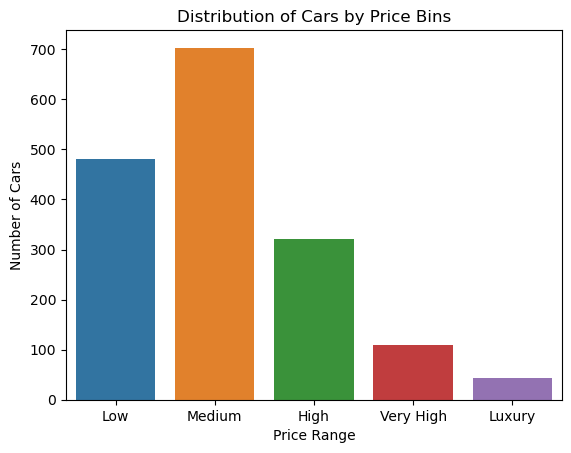

In [97]:
# Plotting the count of each price bin
sns.countplot(x='price_bins', data=df)
plt.title('Distribution of Cars by Price Bins')
plt.xlabel('Price Range')
plt.ylabel('Number of Cars')
plt.show()

# **5. MODELLING AND PRICE PREDICTION**

**preparing data for Prediction**

In [98]:
# Calculate percentage of missing values in each column
missing_data = df.isnull().mean() * 100

# Print the percentage of missing values in each column
print("Percentage of missing values in each column:")
print(missing_data)

# Filter columns with missing values (those with more than 0% missing data)
missing_data = missing_data[missing_data > 0]

# Print columns with missing values and their percentage
print("Columns with missing value and their percentage:")
print(missing_data)

Percentage of missing values in each column:
state                 0.000000
city                  0.000000
year                  0.000000
make                  0.000000
model                 0.000000
series                0.881543
transmission          0.881543
fuel                  0.000000
owner                 0.000000
emi                   0.000000
kilometers            0.000000
mileage               0.000000
seating               0.000000
price                 0.000000
price_depreciation    0.000000
price_bins            8.705234
dtype: float64
Columns with missing value and their percentage:
series          0.881543
transmission    0.881543
price_bins      8.705234
dtype: float64


In [99]:
# Drop columns with missing values
df_cleaned = df.dropna(axis=1)

# Print the cleaned DataFrame
print("DataFrame after dropping columns with missing values:")
print(df_cleaned)

DataFrame after dropping columns with missing values:
             state   city  year  make     model    fuel owner    emi  \
0        CapitalUT  Delhi  2020  FORD  ECOSPORT  Diesel  1st   15425   
1        CapitalUT  Delhi  2016  FORD  ECOSPORT  Petrol  1st   10792   
2        CapitalUT  Delhi  2018  FORD  ECOSPORT  Diesel  1st   13978   
3        CapitalUT  Delhi  2019  FORD  ECOSPORT  Petrol  1st   15503   
4        CapitalUT  Delhi  2015  FORD  ECOSPORT  Petrol  2nd   10440   
...            ...    ...   ...   ...       ...     ...   ...    ...   
1810  UttarPradesh  Noida  2021  TATA     TIAGO  Petrol  1st   12512   
1811  UttarPradesh  Noida  2018  TATA     TIAGO  Petrol  2nd   10459   
1812  UttarPradesh  Noida  2022  TATA     TIAGO     CNG  1st   14799   
1813  UttarPradesh  Noida  2018  TATA     TIAGO  Petrol  1st    9736   
1814  UttarPradesh  Noida  2019  TATA     TIAGO  Petrol  1st   10498   

      kilometers  mileage  seating   price  price_depreciation  
0          96075

In [100]:
df.head

<bound method NDFrame.head of              state   city  year  make     model                   series  \
0        CapitalUT  Delhi  2020  FORD  ECOSPORT     TITANIUM 1.5L DIESEL   
1        CapitalUT  Delhi  2016  FORD  ECOSPORT       1.5AMBIENTE TI VCT   
2        CapitalUT  Delhi  2018  FORD  ECOSPORT     AMBIENTE 1.5L DIESEL   
3        CapitalUT  Delhi  2019  FORD  ECOSPORT     TITANIUM 1.5L PETROL   
4        CapitalUT  Delhi  2015  FORD  ECOSPORT  TITANIUM 1.5L PETROL AT   
...            ...    ...   ...   ...       ...                      ...   
1810  UttarPradesh  Noida  2021  TATA     TIAGO                XZ PETROL   
1811  UttarPradesh  Noida  2018  TATA     TIAGO         XZA 1.2 REVOTRON   
1812  UttarPradesh  Noida  2022  TATA     TIAGO          XZ+ CNG 1.2 RTN   
1813  UttarPradesh  Noida  2018  TATA     TIAGO          XZ 1.2 REVOTRON   
1814  UttarPradesh  Noida  2019  TATA     TIAGO         XZA 1.2 REVOTRON   

     transmission    fuel owner    emi  kilometers  milea

# **Splitting the data into training and testing sets**

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Preprocess the data
#  Handle categorical features (encoding)
categorical_columns = ['state', 'city', 'make', 'model']
encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Separate features (X) and target variable (y)
X = df.drop('price', axis=1)  # Features: all columns except 'price'
y = df['price']  # Target: the 'price' column

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the training and testing sets
print(f"Training set features shape: {X_train.shape}")
print(f"Test set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Test set target shape: {y_test.shape}")

Training set features shape: (1452, 15)
Test set features shape: (363, 15)
Training set target shape: (1452,)
Test set target shape: (363,)


In [102]:
print(df.dtypes) # To get Columns data types

state                    int32
city                     int32
year                     int64
make                     int32
model                    int32
series                  object
transmission            object
fuel                    object
owner                   object
emi                      int64
kilometers               int64
mileage                  int64
seating                  int64
price                    int64
price_depreciation     float64
price_bins            category
dtype: object


In [103]:
print(df.columns)

Index(['state', 'city', 'year', 'make', 'model', 'series', 'transmission',
       'fuel', 'owner', 'emi', 'kilometers', 'mileage', 'seating', 'price',
       'price_depreciation', 'price_bins'],
      dtype='object')


In [104]:
df = df.drop(columns=['price_bins'])

In [105]:
df

,state,city,year,make,model,series,transmission,fuel,owner,emi,kilometers,mileage,seating,price,price_depreciation
0,0,1,2020,0,6,TITANIUM 1.5L DIESEL,Manual,Diesel,1st,15425,96075,9,5,789000,390.594059
1,0,1,2016,0,6,1.5AMBIENTE TI VCT,Manual,Petrol,1st,10792,55017,9,5,552000,273.809524
2,0,1,2018,0,6,AMBIENTE 1.5L DIESEL,Manual,Diesel,1st,13978,24931,9,5,715000,354.311199
3,0,1,2019,0,6,TITANIUM 1.5L PETROL,Manual,Petrol,1st,15503,22270,9,5,793000,392.768697
4,0,1,2015,0,6,TITANIUM 1.5L PETROL AT,Automatic,Petrol,2nd,10440,78906,9,5,534000,265.012407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,5,7,2021,7,20,XZ PETROL,Manual,Petrol,1st,12512,21726,11,5,640000,316.674913
1811,5,7,2018,7,20,XZA 1.2 REVOTRON,Automatic,Petrol,2nd,10459,27451,11,5,535000,265.113974
1812,5,7,2022,7,20,XZ+ CNG 1.2 RTN,Manual,CNG,1st,14799,30399,11,5,757000,374.381800
1813,5,7,2018,7,20,XZ 1.2 REVOTRON,Manual,Petrol,1st,9736,12249,11,5,498000,246.778989


# **XGBoost and Evaluating MAE, RMSE**

In [106]:
# 1. Import Necessary Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 2. Preprocess the Data
# List of categorical columns to be encoded
categorical_columns = ['state', 'city', 'make', 'model', 'series', 'transmission', 'fuel', 'owner']

# Initialize the encoder
encoder = LabelEncoder()

# Encode each categorical column
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col].astype(str))  # Encode each categorical column as integers

# Handle missing values in the features (X) - Optional (if there are missing values in features)
df = df.fillna(0)  # Filling NaNs with 0 (or use other strategies like median, mean, etc.)

# 3. Separate Features and Target Variable
X = df.drop('price', axis=1)  # Features: all columns except 'price'
y = df['price']  # Target: the 'price' column

# 4. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Create and Train the XGBoost Model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  # XGBoost regression model for predicting price

# Train the model
model.fit(X_train, y_train)  # Fit the model to the training data

# 6. Make Predictions
y_pred = model.predict(X_test)  # Predict on the test set

# 7. Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)  # Calculate Mean Absolute Error (MAE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate Root Mean Squared Error (RMSE)

# 8. Output the Results
print(f"Mean Absolute Error (MAE): {mae}")  # Print MAE
print(f"Root Mean Squared Error (RMSE): {rmse}")  # Print RMSE

Mean Absolute Error (MAE): 1540.286027892562
Root Mean Squared Error (RMSE): 3621.984486779937


In [107]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9998605573338343


# 6. BUSINESS INSIGHTS AND VISUALIZATION

<Axes: xlabel='price', ylabel='Density'>

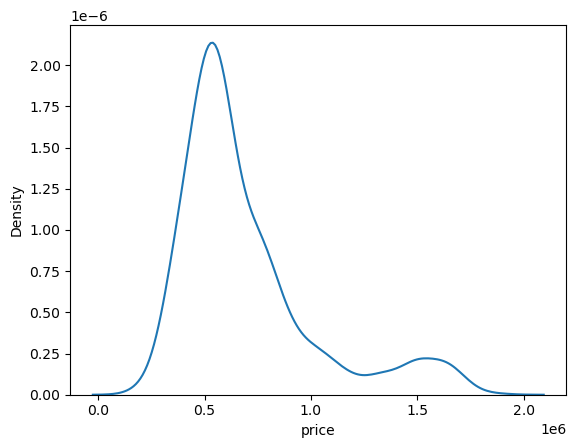

In [108]:
# Kernal Density Estimate (KDE) plot to visualize the distribution of car prices
sns.kdeplot(data=df, x="price")

<Axes: xlabel='kilometers', ylabel='Density'>

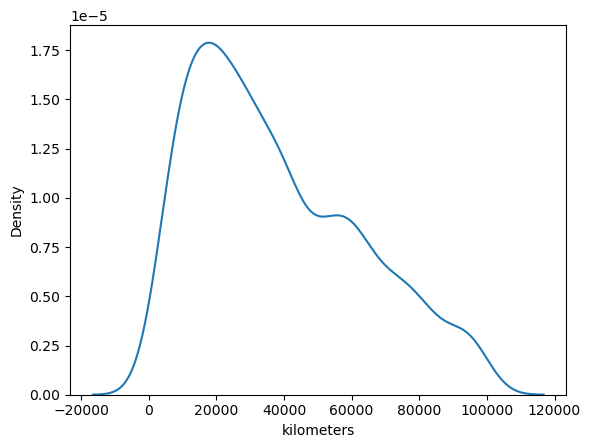

In [109]:
# KDE plot to visualize the distribution of car kilometers driven
sns.kdeplot(data=df, x="kilometers")

<Axes: xlabel='mileage', ylabel='Density'>

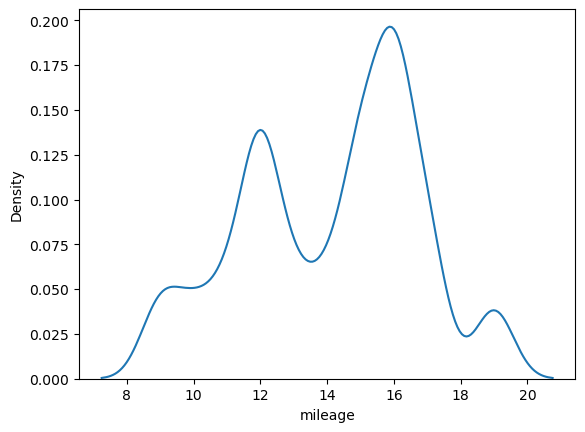

In [110]:
#KDE plot to visualize the distribution of car mileage
sns.kdeplot(data=df, x="mileage")

In [111]:
# Calculate the skewness of selected numerical columns
skewness = df[["price", "kilometers", "mileage"]].skew()

# Print the skewness of numerical columns
print("\nSkewness of numerical columns:")
print(skewness)


Skewness of numerical columns:
price         1.559722
kilometers    0.630941
mileage      -0.241403
dtype: float64


The correlation between price and kilometers is: -0.4213071508614418


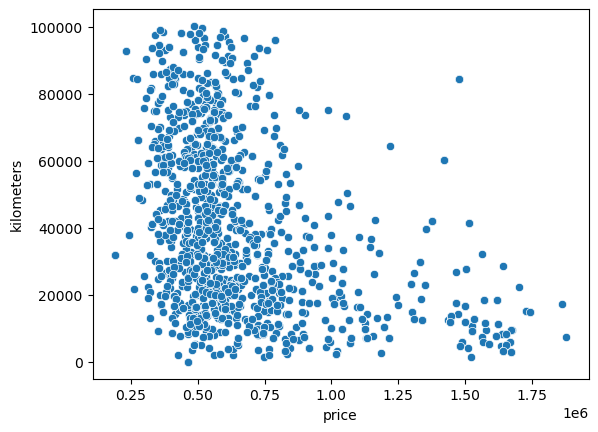

In [112]:
# Create a scatter plot between price and kilometers
sns.scatterplot(data=df, x="price", y="kilometers")

# Calculate and print the correlation between price and kilometers
print("The correlation between price and kilometers is:", df["price"].corr(df["kilometers"]))

The correlation between price and mileage is: -0.3195211371594323


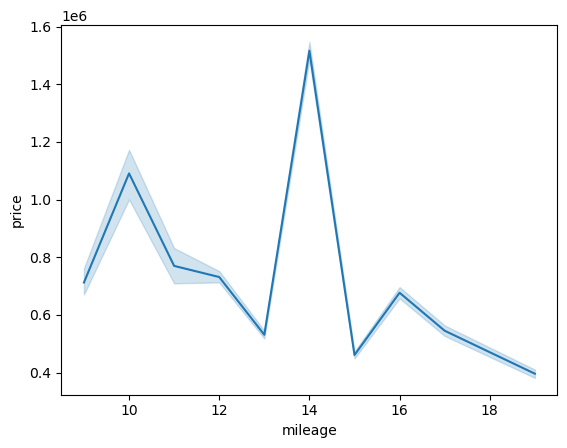

In [113]:
# Create a line plot to visualize the relationship between price and mileage
sns.lineplot(data=df, x="mileage", y="price")

# Calculate and print the correlation between price and mileage
print("The correlation between price and mileage is:", df["price"].corr(df["mileage"]))

   fuel  transmission   price
0     1             9  789000
1     2             9  552000
2     1             9  715000
3     2             9  793000
4     2             7  534000


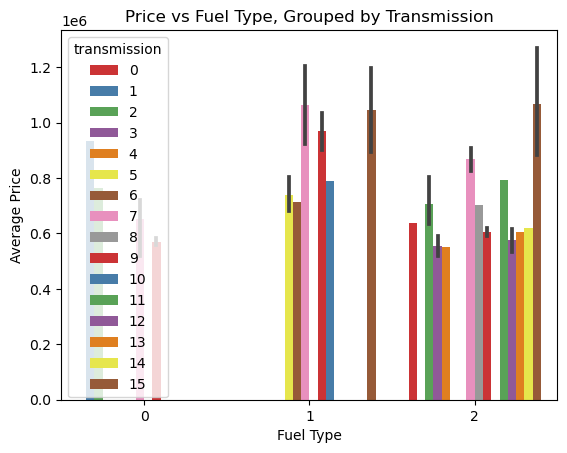

In [114]:
# Check if the columns 'fuel' and 'transmission' exist in your dataframe
print(df[['fuel', 'transmission', 'price']].head())

# Create a barplot with 'fuel' on x-axis, 'price' on y-axis, and grouped by 'transmission' with custom color palette
sns.barplot(data=df, x="fuel", y="price", hue="transmission", palette="Set1")

# Add title and labels
plt.title('Price vs Fuel Type, Grouped by Transmission')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')

# Show the plot
plt.show()

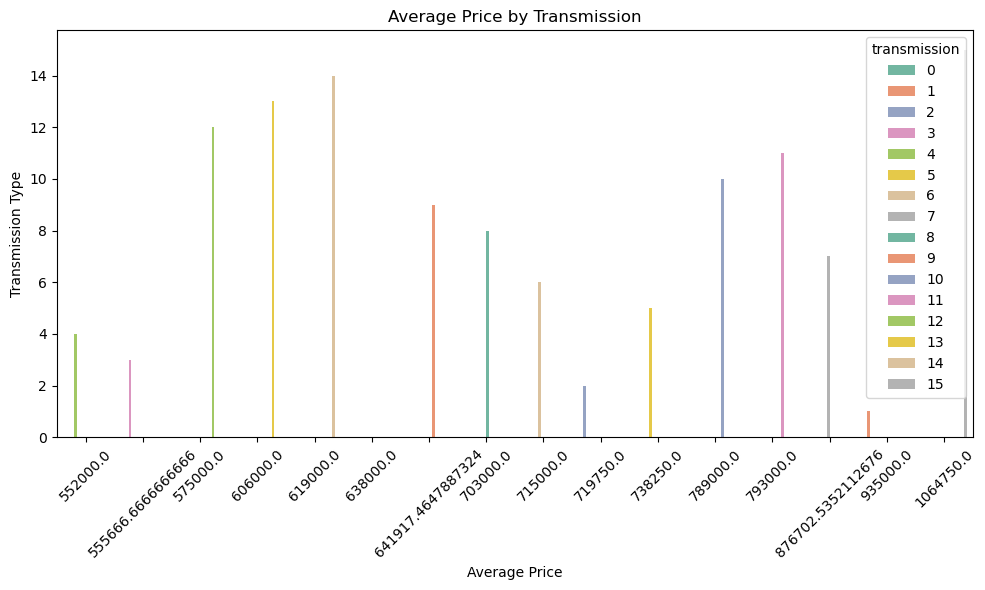

In [115]:
# Group the data by 'transmission' and calculate the average 'price' for each category
avg_price_by_transmission = df.groupby('transmission')['price'].mean().reset_index()

# Create the barplot with 'hue' for 'transmission' to apply different colors for each category
plt.figure(figsize=(10, 6))  # Adjusting figure size to give more space
sns.barplot(data=avg_price_by_transmission, x='price', y='transmission', hue='transmission', palette='Set2')

# Add title and labels
plt.title('Average Price by Transmission')
plt.xlabel('Average Price')
plt.ylabel('Transmission Type')

# Rotate x-axis labels if they overlap (optional based on your labels)
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

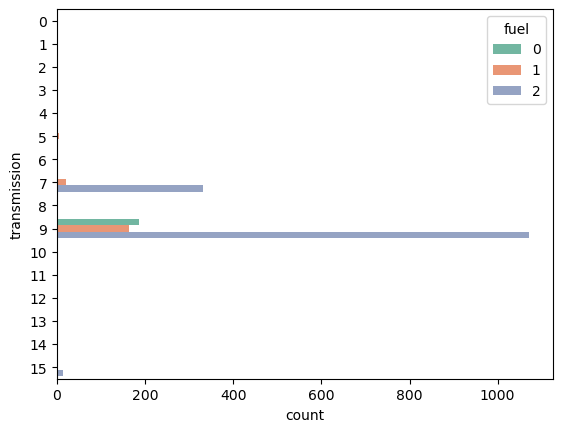

In [116]:
# Create a count plot of 'transmission' with 'fuel' as the hue
sns.countplot(data=df, y="transmission", hue="fuel",palette="Set2")

# Show the plot
plt.show()

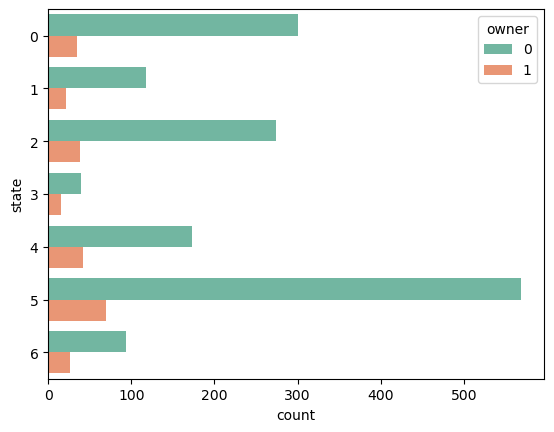

In [117]:
# Create a count plot of 'state' with 'owner' as the hue
sns.countplot(data=df, y="state", hue="owner", palette="Set2")

# Show the plot
plt.show()

In [118]:
#Analyze the distribution of car listings by year
#The result will be a table (DataFrame) with each year (from the year column) as the index and the count of non-null entries in the other columns. 
#This will allow you to see how many car listings were posted each year.
df.groupby("year").count()

,state,city,make,model,series,transmission,fuel,owner,emi,kilometers,mileage,seating,price,price_depreciation
year,,,,,,,,,,,,,,
2010,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2011,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2012,33,33,33,33,33,33,33,33,33,33,33,33,33,33
2013,31,31,31,31,31,31,31,31,31,31,31,31,31,31
2014,83,83,83,83,83,83,83,83,83,83,83,83,83,83
2015,133,133,133,133,133,133,133,133,133,133,133,133,133,133
2016,162,162,162,162,162,162,162,162,162,162,162,162,162,162
2017,184,184,184,184,184,184,184,184,184,184,184,184,184,184
2018,215,215,215,215,215,215,215,215,215,215,215,215,215,215


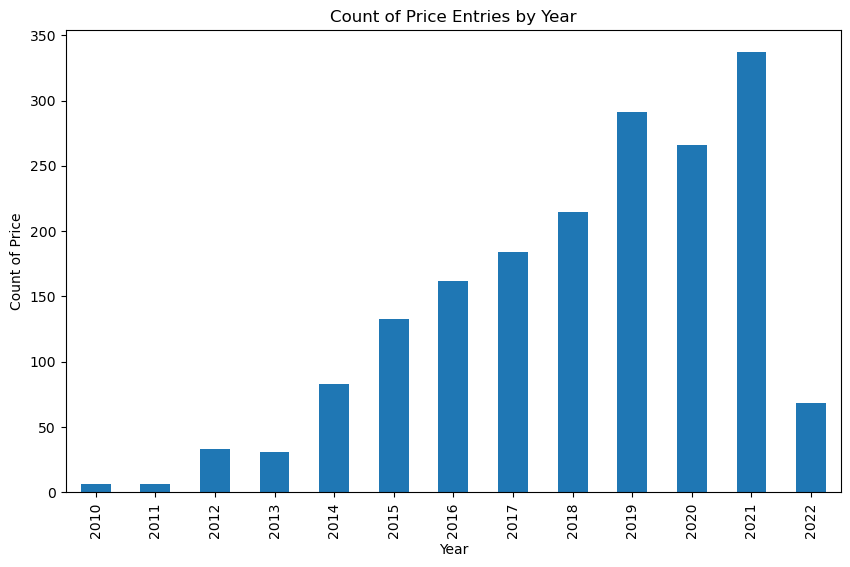

In [119]:
# Group the data by 'year' and count the number of entries in the 'price' column
df.groupby('year')['price'].count().plot(kind='bar', figsize=(10, 6))

# Add title and labels
plt.title('Count of Price Entries by Year')
plt.xlabel('Year')
plt.ylabel('Count of Price')

# Show the plot
plt.show()

In [120]:
df.groupby(["make","year"])["price"].mean()
#The code calculates the average price for each make of cars in each year.
# for example, you have a car make "Toyota" and years "2015" and "2016",
#the code will calculate the average price of all Toyota cars in the year 2015,
#and separately the average price for all Toyota cars in the year 2016.

make  year
0     2013    464000.000000
      2014    515500.000000
      2015    553750.000000
      2016    597409.090909
      2017    666187.500000
                  ...      
7     2018    600026.315789
      2019    801300.000000
      2020    776337.349398
      2021    875125.000000
      2022    841187.500000
Name: price, Length: 67, dtype: float64

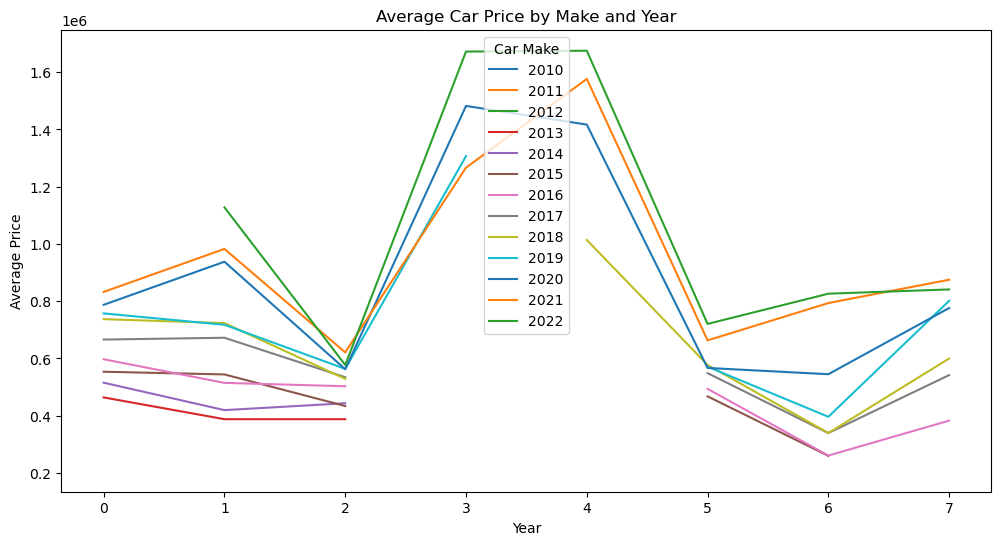

In [121]:
# Group by 'make' and 'year', then calculate the mean price
avg_price_by_make_year = df.groupby(["make", "year"])["price"].mean().unstack()

# Plot
avg_price_by_make_year.plot(figsize=(12, 6))
plt.title("Average Car Price by Make and Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.legend(title="Car Make")
plt.show()

In [122]:
df.groupby(["city", "make", "model"])["model"].count()

city  make  model
0     0     18        5
            20        1
      1     2         9
            12        8
            17       15
                     ..
7     7     6        17
            13       10
8     6     3         1
            4         1
            14        1
Name: model, Length: 153, dtype: int64

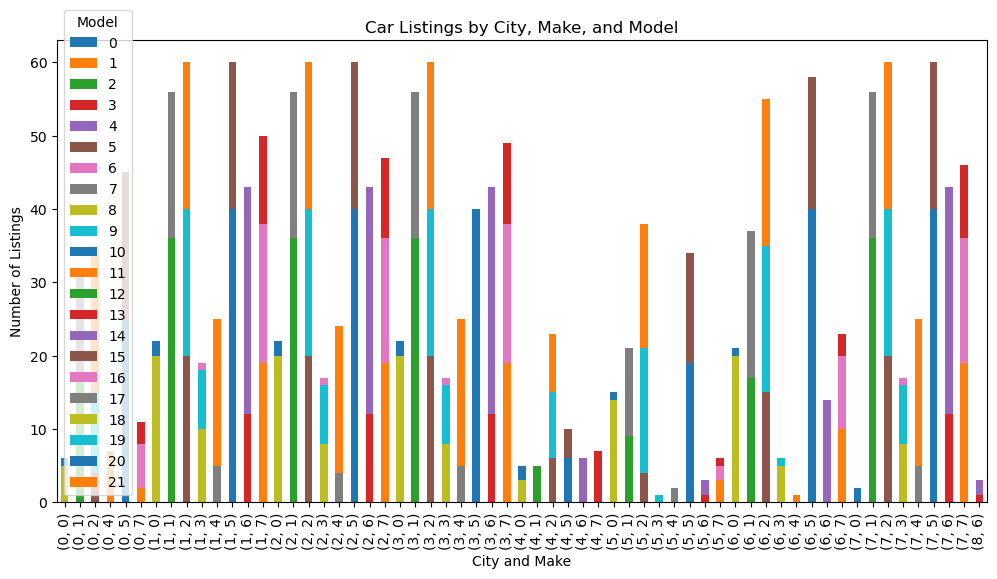

In [123]:
# Group by city, make, and model, then count the number of listings
model_count = df.groupby(["city", "make", "model"])["model"].count().unstack()

# Plot the results
model_count.plot(kind="bar", stacked=True, figsize=(12, 6))

plt.title("Car Listings by City, Make, and Model")
plt.xlabel("City and Make")
plt.ylabel("Number of Listings")
plt.legend(title="Model")
plt.xticks(rotation=90)  # Rotate the x-axis labels for readability
plt.show()

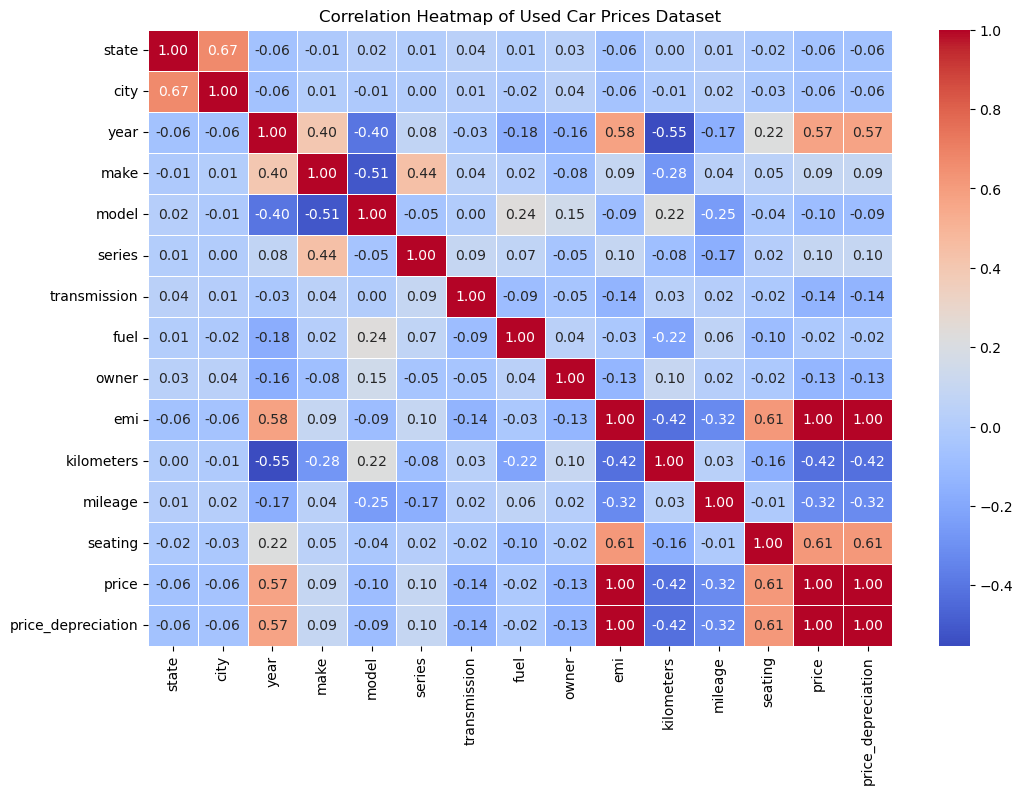

In [124]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title("Correlation Heatmap of Used Car Prices Dataset")
plt.show()

# **Insight**

This project successfully analyzed the used car market across multiple Indian states and built machine learning models to predict car prices with good accuracy.

**Key Drivers of Price:**

Car age (year of manufacture), mileage, and fuel type were the strongest predictors.

Transmission type (automatic vs. manual) and brand reputation also influenced price.

**Market Insights:**

Diesel cars tend to retain value longer than petrol cars.

Automatic cars generally cost more, but demand varies by state.

Cars with lower mileage and newer models consistently attract higher prices.

**Business Value:**

Dealers can use this model to set fair and competitive prices, reducing overpricing.

Buyers get transparent price benchmarks, improving trust in the resale market.

Overall, the system can increase sales efficiency and profitability in the used car sector.